In [1]:
import os
import pandas as pd
import numpy as np

def process_temperature_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    temp_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "TEMP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            temp_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(temp_values)) / sample_rate
            temp_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_TEMP": temp_values
            })
            temp_data[student] = temp_df
    
    merged_df = None
    for df in temp_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    temp_cols = [col for col in grouped_df.columns if "TEMP" in col]
    grouped_df["avg_TEMP"] = grouped_df[temp_cols].mean(axis=1)
    
    output_file = f"TEMP{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")

project_folder = "RawData"
process_temperature_data(project_folder, "Final", 180)
process_temperature_data(project_folder, "Midterm 1", 90)
process_temperature_data(project_folder, "Midterm 2", 90)


Saved TEMPfinal.csv
Saved TEMPmidterm 1.csv
Saved TEMPmidterm 2.csv


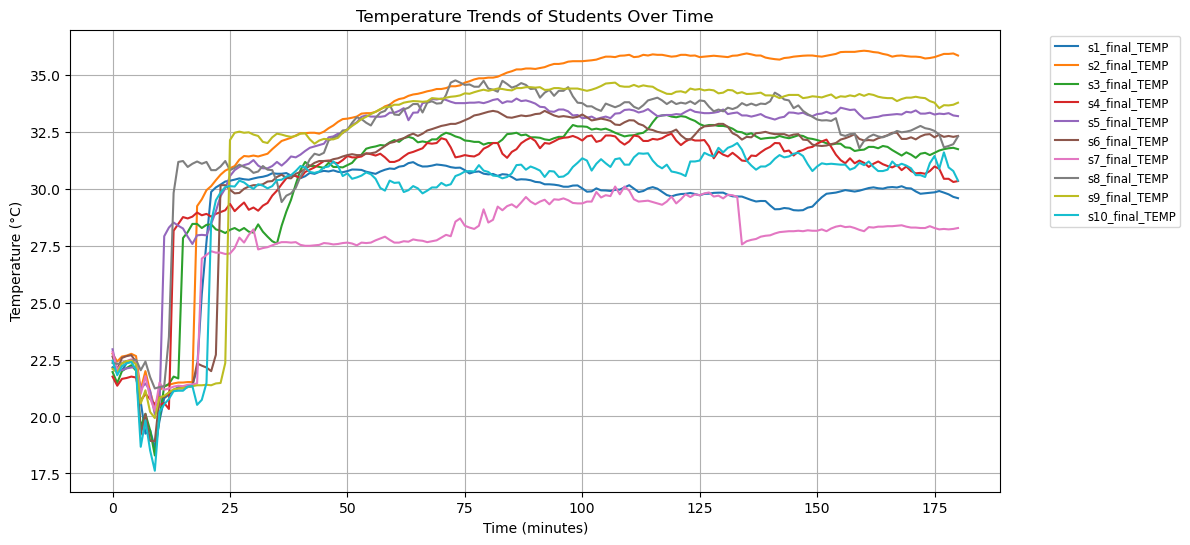

In [2]:
import matplotlib.pyplot as plt

# Load CSV file
file_path = "TEMPfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_TEMP" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [3]:
def process_hr_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    hr_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "HR.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            hr_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(hr_values)) / sample_rate
            hr_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_HR": hr_values
            })
            hr_data[student] = hr_df
    
    merged_df = None
    for df in hr_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    hr_cols = [col for col in grouped_df.columns if "HR" in col]
    grouped_df["avg_HR"] = grouped_df[hr_cols].mean(axis=1)
    
    output_file = f"HR{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_hr_data(project_folder, "Final", 180)
process_hr_data(project_folder, "Midterm 1", 90)
process_hr_data(project_folder, "Midterm 2", 90)

Saved HRfinal.csv
Saved HRmidterm 1.csv
Saved HRmidterm 2.csv


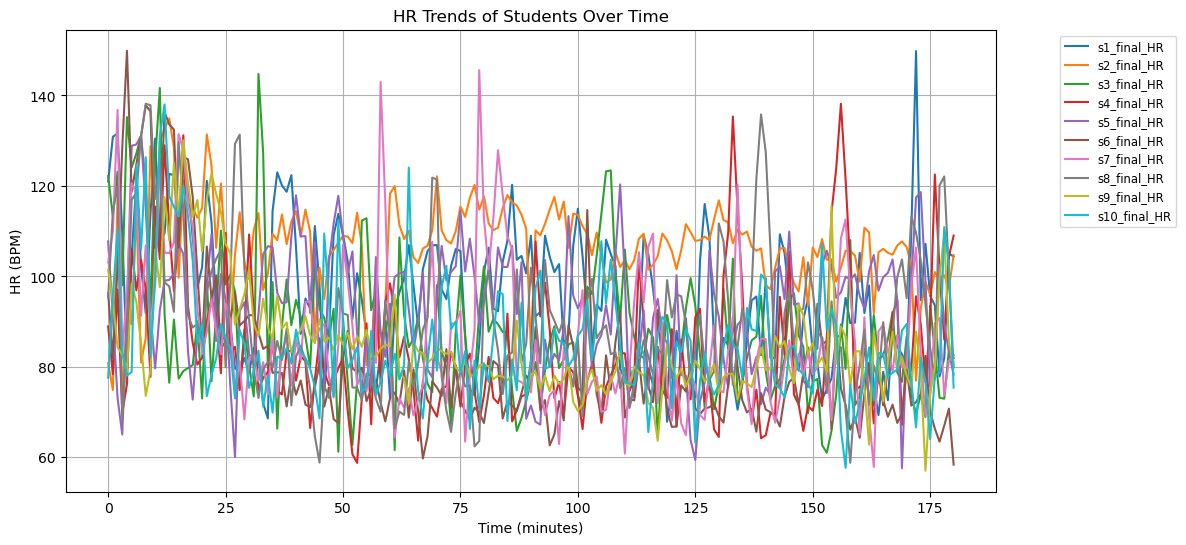

In [4]:
# Load CSV file
file_path = "HRfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_HR" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("HR (BPM)")
plt.title("HR Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [5]:
def process_eda_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    eda_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "EDA.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            eda_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(eda_values)) / sample_rate
            eda_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_EDA": eda_values
            })
            eda_data[student] = eda_df
    
    merged_df = None
    for df in eda_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    eda_cols = [col for col in grouped_df.columns if "EDA" in col]
    grouped_df["avg_EDA"] = grouped_df[eda_cols].mean(axis=1)
    
    output_file = f"EDA{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_eda_data(project_folder, "Final", 180)
process_eda_data(project_folder, "Midterm 1", 90)
process_eda_data(project_folder, "Midterm 2", 90)

Saved EDAfinal.csv
Saved EDAmidterm 1.csv
Saved EDAmidterm 2.csv


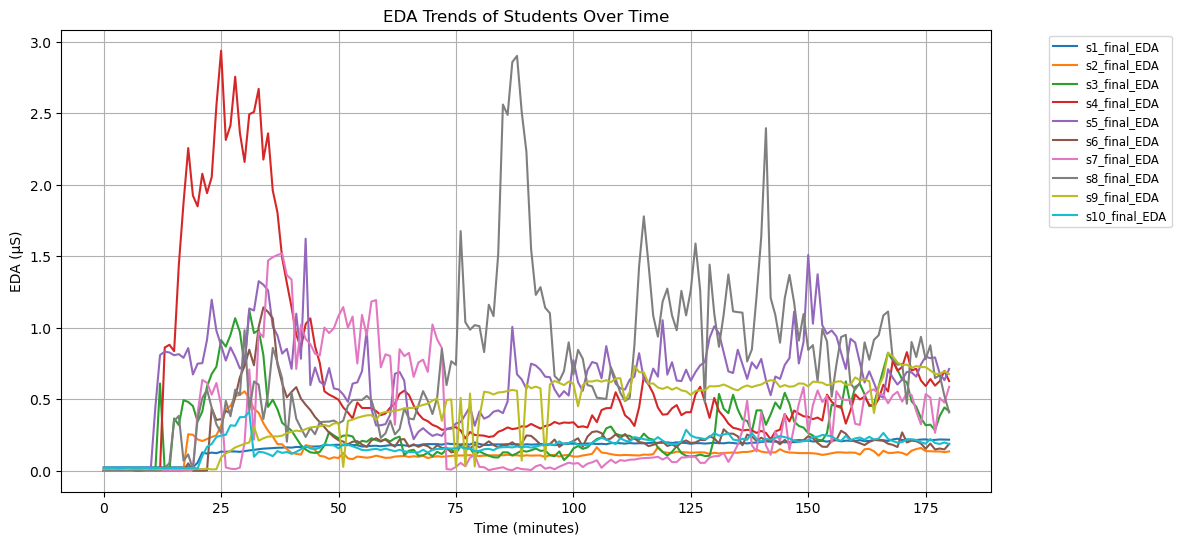

In [15]:
# Load CSV file
file_path = "EDAfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_EDA" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("EDA (μS)")
plt.title("EDA Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [16]:
def process_bvp_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    bvp_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "BVP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            bvp_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(bvp_values)) / sample_rate
            bvp_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_BVP": bvp_values
            })
            bvp_data[student] = bvp_df
    
    merged_df = None
    for df in bvp_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    bvp_cols = [col for col in grouped_df.columns if "BVP" in col]
    grouped_df["avg_BVP"] = grouped_df[bvp_cols].mean(axis=1)
    
    output_file = f"BVP{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_bvp_data(project_folder, "Final", 180)
process_bvp_data(project_folder, "Midterm 1", 90)
process_bvp_data(project_folder, "Midterm 2", 90)

Saved BVPfinal.csv
Saved BVPmidterm 1.csv
Saved BVPmidterm 2.csv


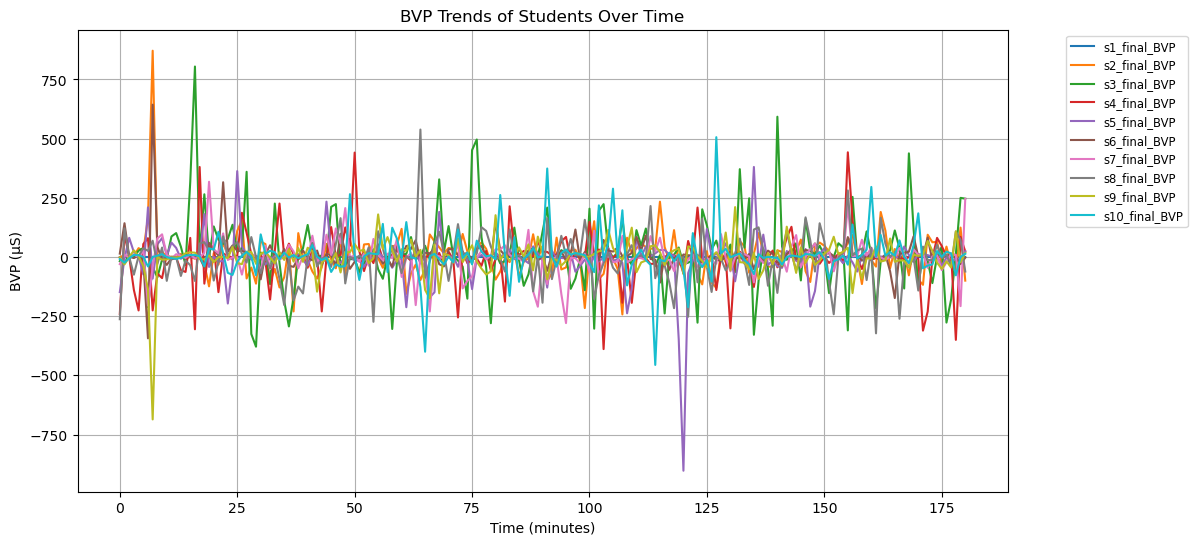

In [17]:
# Load CSV file
file_path = "BVPfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_BVP" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("BVP (μS)")
plt.title("BVP Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

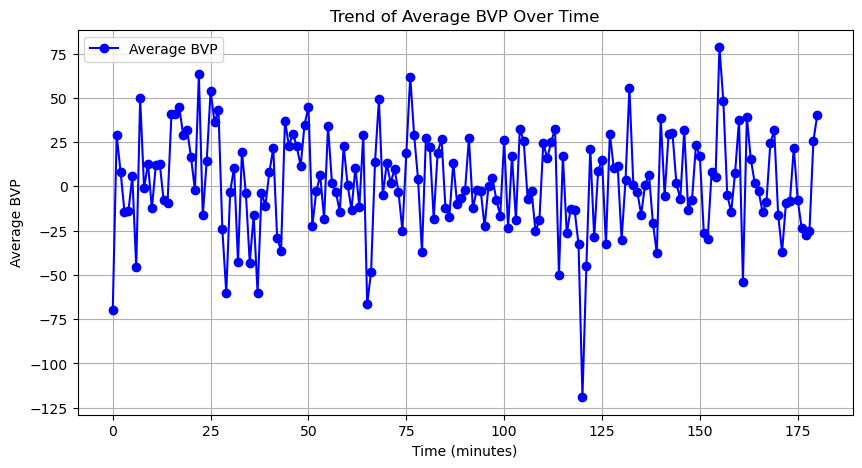

In [ ]:
import os
import pandas as pd

def process_avg_feature_across_tests(feature):
    #Compute average values for a feature across all tests.
    test_files = {
        'final': f'CleanData/{feature}/{feature}final.csv',
        'mt1': f'CleanData/{feature}/{feature}midterm 1.csv',
        'mt2': f'CleanData/{feature}/{feature}midterm 2.csv'
    }
    
    dfs = {}
    for key, file in test_files.items():
        if os.path.exists(file):
            dfs[key] = pd.read_csv(file)
            dfs[key] = dfs[key][['minute', f'avg_{feature}']]
            dfs[key].rename(columns={f'avg_{feature}': f'{key}_avg_{feature}'}, inplace=True)
    
    merged_df = dfs['final']
    for key in ['mt1', 'mt2']:
        merged_df = pd.merge(merged_df, dfs[key], on='minute', how='outer')
    
    # Compute test progress assuming max duration of 180 min
    merged_df['test_progress'] = (merged_df['minute'] / 180) * 100
    
    # Save final merged file
    output_file = f'avg_{feature}_all_tests.csv'
    merged_df.to_csv(output_file, index=False)
    print(f'Saved: {output_file}')

# Example usage
features = ['TEMP', 'EDA', 'HR', 'BVP']
for feature in features:
    process_avg_feature_across_tests(feature)

Saved: avg_TEMP_all_tests.csv
Saved: avg_EDA_all_tests.csv
Saved: avg_HR_all_tests.csv
Saved: avg_BVP_all_tests.csv
